# preparing brats africa dataset for NVIDIA model
. changing folders and files names to match BraTS2021 dataset

In [6]:
# extracting the contents of the "BraTS2021_Training_Data.tar"
!tar -xvf  "/media/workstation04/New Volume/MMMAI/BraTSData/BraTS2021_Training_Data.tar" -C "/home/workstation04/GP_MMMAI/All_Data"

./
./.DS_Store
./BraTS2021_00000/
./BraTS2021_00000/BraTS2021_00000_flair.nii.gz
./BraTS2021_00000/BraTS2021_00000_seg.nii.gz
./BraTS2021_00000/BraTS2021_00000_t1.nii.gz
./BraTS2021_00000/BraTS2021_00000_t1ce.nii.gz
./BraTS2021_00000/BraTS2021_00000_t2.nii.gz
./BraTS2021_00002/
./BraTS2021_00002/BraTS2021_00002_flair.nii.gz
./BraTS2021_00002/BraTS2021_00002_seg.nii.gz
./BraTS2021_00002/BraTS2021_00002_t1.nii.gz
./BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz
./BraTS2021_00002/BraTS2021_00002_t2.nii.gz
./BraTS2021_00003/
./BraTS2021_00003/BraTS2021_00003_flair.nii.gz
./BraTS2021_00003/BraTS2021_00003_seg.nii.gz
./BraTS2021_00003/BraTS2021_00003_t1.nii.gz
./BraTS2021_00003/BraTS2021_00003_t1ce.nii.gz
./BraTS2021_00003/BraTS2021_00003_t2.nii.gz
./BraTS2021_00005/
./BraTS2021_00005/BraTS2021_00005_flair.nii.gz
./BraTS2021_00005/BraTS2021_00005_seg.nii.gz
./BraTS2021_00005/BraTS2021_00005_t1.nii.gz
./BraTS2021_00005/BraTS2021_00005_t1ce.nii.gz
./BraTS2021_00005/BraTS2021_00005_t2.nii.gz
./Bra

In [57]:
# unzipping brats africa data(only once)
!unzip "/media/workstation04/New Volume/MMMAI/BraTS_Africa2023/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip" -d "/home/workstation04/GP_MMMAI/Brats_Africa60"

Archive:  /media/workstation04/New Volume/MMMAI/BraTS_Africa2023/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip
   creating: /home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/
   creating: /home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/
  inflating: /home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/BraTS-SSA-00121-000-seg.nii.gz  
  inflating: /home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t1n.nii.gz  
  inflating: /home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t2f.nii.gz  
  inflating: /home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t2w.nii

#### visualisation and comparing to brats2021 dataset

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import numpy as np

def read_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data

def generate_legend(color_map, labels):
    legend_elements = [Patch(color=color_map[label], label=f"Label {label}") for label in labels]
    return legend_elements

def visualize_segmentation(image, segmentation, color_map, slice_no,flag):
    unique_labels = np.unique(segmentation)
    
    # Display original image
    plt.subplot(1, 2, 1)
    if flag:
        plt.imshow(image[:,:,slice_no,0], cmap='gray')
    else:     
        plt.imshow(image[:,:,slice_no], cmap='gray')

    plt.title("Original Image")

    # Display segmentation
    plt.subplot(1, 2, 2)
    overlay = np.zeros_like(segmentation)

    for label in unique_labels:
        mask = (segmentation == label)
        overlay[mask] = label

    cmap = ListedColormap([color_map[label] for label in unique_labels])
    plt.imshow(overlay[:,:,slice_no], cmap=cmap, vmin=0, vmax=len(color_map)-1)
    plt.title("Segmentation Overlay")

    # Display legend
    legend_elements = generate_legend(color_map, unique_labels)
    plt.legend(handles=legend_elements, loc='lower right')

    plt.show()

Segmentation Dimensions: (240, 240, 155)


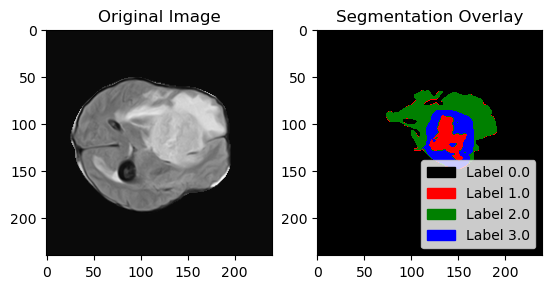

In [59]:
# BraTS Africa
image_path = "/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00007-000/BraTS-SSA-00007-000-t2f.nii.gz"
segmentation_path = "/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00007-000/BraTS-SSA-00007-000-seg.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 0)

Segmentation Dimensions: (240, 240, 155)


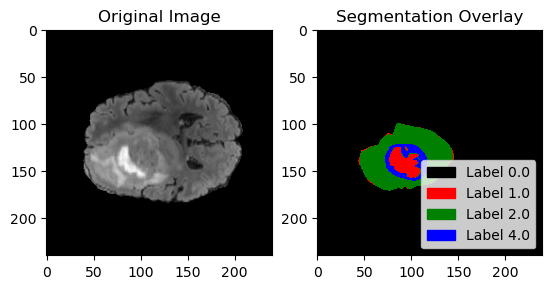

In [3]:
# BraTS 2021
image_path = "/home/workstation04/GP_MMMAI/All_Data/BraTS2021_00002/BraTS2021_00002_flair.nii.gz"
segmentation_path = "/home/workstation04/GP_MMMAI/All_Data/BraTS2021_00002/BraTS2021_00002_seg.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 0)

### 3 things should be changed
1. sequences naming 
2. segmentation labels
```
    . labels in BraTS2021 :{"0": "background", "1": "non-enhancing tumor", "2": "edema", "4": "enhancing tumour"}
    . labels in BraTS Africa :{"0": "background", "1": "non-enhancing tumor", "2": "edema", "3": "enhancing tumour"}
    . 3 --> 4
```
3. rotate 180 degree to the right



In [61]:
def modify_seg_file(seg_file_path):
    img = nib.load(seg_file_path)
    data = img.get_fdata()
    # Modify segmentation values
    data[data == 3] = 4

    # Save the modified segmentation file
    nib.save(nib.Nifti1Image(data, img.affine), seg_file_path)

In [62]:
# change sequence naming of africa dataset to match BraTS2021



import os

folder_path = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'  # Replace with the actual path to your folder

for subdir, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.startswith('BraTS-SSA-') and file_name.endswith('.nii.gz'):
            old_file_path = os.path.join(subdir, file_name)
            parts = file_name.split('-')
            file_prefix = parts[2]
            file_suffix = parts[4].split('.')[0]

            if 'seg' not in file_suffix:
                if 't1c' in file_suffix:
                    file_suffix = file_suffix.replace('t1c', 't1ce')
                if 't1n' in file_suffix:
                    file_suffix = file_suffix.replace('t1n', 't1')
                if 't2f' in file_suffix:
                    file_suffix = file_suffix.replace('t2f', 'flair')
                if 't2w' in file_suffix:
                    file_suffix = file_suffix.replace('t2w', 't2')
            else:
                modify_seg_file(os.path.join(folder_path,subdir ,file_name))        

            new_file_name = 'BraTS-SSA_{}_{}.nii.gz'.format(file_prefix, file_suffix)
            new_file_path = os.path.join(subdir, new_file_name)
            os.rename(old_file_path, new_file_path)


In [63]:
# changing folders named to match BraTS2021
import os
import csv

folder_path = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'  # Replace with the actual path to your folder
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
file_prefix = 1667

# Create and open the CSV file for writing
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/brats_africa_rename.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = ['Old Name', 'New Name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # Iterate through each folder
    for old_name in folders:
        new_file_name = 'BraTS2021_0{}'.format(file_prefix)
        old_file_path = os.path.join(folder_path, old_name)
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the folder
        os.rename(old_file_path, new_file_path)
        
        # Write the old and new names to the CSV file
        writer.writerow({'Old Name': old_name, 'New Name': new_file_name})
        
        file_prefix += 1

print("Folder renaming and CSV file creation completed.")


Folder renaming and CSV file creation completed.


In [65]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/brats_africa_rename.csv'

# Read the CSV file as a DataFrame
df = pd.read_csv(csv_file_path)

# Print the DataFrame
print(df)


               Old Name         New Name
0   BraTS-SSA-00011-000  BraTS2021_01667
1   BraTS-SSA-00014-000  BraTS2021_01668
2   BraTS-SSA-00050-000  BraTS2021_01669
3   BraTS-SSA-00026-000  BraTS2021_01670
4   BraTS-SSA-00081-000  BraTS2021_01671
5   BraTS-SSA-00012-000  BraTS2021_01672
6   BraTS-SSA-00116-000  BraTS2021_01673
7   BraTS-SSA-00221-000  BraTS2021_01674
8   BraTS-SSA-00055-000  BraTS2021_01675
9   BraTS-SSA-00135-000  BraTS2021_01676
10  BraTS-SSA-00144-000  BraTS2021_01677
11  BraTS-SSA-00047-000  BraTS2021_01678
12  BraTS-SSA-00112-000  BraTS2021_01679
13  BraTS-SSA-00152-000  BraTS2021_01680
14  BraTS-SSA-00146-000  BraTS2021_01681
15  BraTS-SSA-00133-000  BraTS2021_01682
16  BraTS-SSA-00121-000  BraTS2021_01683
17  BraTS-SSA-00025-000  BraTS2021_01684
18  BraTS-SSA-00076-000  BraTS2021_01685
19  BraTS-SSA-00010-000  BraTS2021_01686
20  BraTS-SSA-00080-000  BraTS2021_01687
21  BraTS-SSA-00202-000  BraTS2021_01688
22  BraTS-SSA-00096-000  BraTS2021_01689
23  BraTS-SSA-00

In [66]:
# change naming of africa dataset to match BraTS2021
import os

folder_path = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'  # Replace with the actual path to your folder

for subdir, dirs, files in os.walk(folder_path):

    for file_name in files:
        if file_name.startswith('BraTS-SSA_') and file_name.endswith('.nii.gz'):
            old_file_path = os.path.join(subdir, file_name)
            folder_name = os.path.basename(os.path.dirname(old_file_path))
            parts = file_name.split('_')
            file_suffix = parts[2]
            new_file_name = '{}_{}'.format(folder_name, file_suffix)
            new_file_path = os.path.join(subdir, new_file_name)
            os.rename(old_file_path, new_file_path)


In [67]:
#  Rotation 180 degree
import os
import nibabel as nib
import numpy as np

def rotate_nifti_file(file_path):
    # Load NIfTI data
    img = nib.load(file_path)
    data = img.get_fdata()

    # Rotate data by 180 degrees
    rotated_data = np.rot90(data, 2, axes=(0, 1))

    # Save the changes to the original file
    rotated_img = nib.Nifti1Image(rotated_data, affine=img.affine)
    nib.save(rotated_img, file_path)

def rotate_nifti_files_in_directory(directory_path):
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".nii.gz"):
                file_path = os.path.join(root, file)
                rotate_nifti_file(file_path)

# Replace 'your_directory_path' with the actual path to your top-level directory
directory_path = "/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"
rotate_nifti_files_in_directory(directory_path)


Segmentation Dimensions: (240, 240, 155)


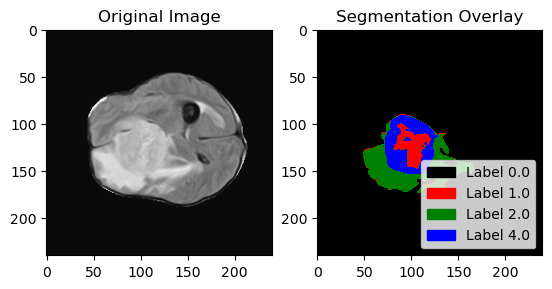

In [22]:
# BraTS Africa  BraTS-SSA-00007-000 -->  BraTS2021_01714

image_path = "/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS2021_01714/BraTS2021_01714_flair.nii.gz"
segmentation_path = "/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS2021_01714/BraTS2021_01714_seg.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 0)

### Take random 10 samples to be a test set

In [69]:
import os
import csv
import random
import shutil

# Path to the folder containing the data
folder_path = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'

# Path to the CSV file containing old and new folder names
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/brats_africa_rename.csv'

# Path to the test folder where the selected folders will be moved
test_folder_path = '/home/workstation04/GP_MMMAI/Nvidia2_testset'


# Read the new names from the CSV file
new_names = []
with open(csv_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        new_names.append(row['New Name'])

# Randomly select 10 folder names for the test set
test_folders = random.sample(new_names, 10)

# Move the selected folders to the test folder
for folder_name in test_folders:
    src_folder_path = os.path.join(folder_path, folder_name)
    dest_folder_path = os.path.join(test_folder_path, folder_name)
    shutil.move(src_folder_path, dest_folder_path)

# Write the selected folder names to a new CSV file
picked_samples_csv_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/testset.csv'
with open(picked_samples_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['Sample Name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for folder_name in test_folders:
        writer.writerow({'Sample Name': folder_name})

# Write the unpicked folder names to a new CSV file
unpicked_samples = set(new_names) - set(test_folders)
unpicked_samples_csv_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/trainingset.csv'
with open(unpicked_samples_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['Sample Name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for folder_name in unpicked_samples:
        writer.writerow({'Sample Name': folder_name})

print("Test folders moved to test folder, picked sample names saved in a CSV file, and unpicked sample names saved in another CSV file.")

Test folders moved to test folder, picked sample names saved in a CSV file, and unpicked sample names saved in another CSV file.


In [70]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/testset.csv'
# Read the CSV file as a DataFrame
df = pd.read_csv(csv_file_path)
# Print the DataFrame
print(df)


       Sample Name
0  BraTS2021_01724
1  BraTS2021_01715
2  BraTS2021_01684
3  BraTS2021_01693
4  BraTS2021_01669
5  BraTS2021_01682
6  BraTS2021_01677
7  BraTS2021_01705
8  BraTS2021_01717
9  BraTS2021_01707


In [71]:
import shutil
import os

def copy_folder_contents(source_folder, destination_folder):

    # Ensure the destination folder exists; create it if not
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    # Get the list of files and subdirectories in the source folder
    contents = os.listdir(source_folder)

    # Iterate over each item in the source folder
    for item in contents:
        # Create the full path of the item in the source folder
        source_path = os.path.join(source_folder, item)

        # Create the full path of the item in the destination folder
        destination_path = os.path.join(destination_folder, item)

        # Copy the item to the destination folder
        if os.path.isdir(source_path):
            # If the item is a directory, recursively copy its contents
            shutil.copytree(source_path, destination_path)
        else:
            # If the item is a file, copy it
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'
destination_folder = '/home/workstation04/GP_MMMAI/data/BraTS2021_train'

copy_folder_contents(source_folder, destination_folder)

-----------------------------------------------------------
# Prepare Data

- this path /home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2 is changed to /home/workstation04/GP_MMMAI/data/BraTS2021_train

In [23]:
import json
import os
from glob import glob
from subprocess import call
import time
import nibabel
import numpy as np
from joblib import Parallel, delayed
from skimage.exposure import rescale_intensity
from scipy.ndimage.measurements import label
import matplotlib.pyplot as plt


# Preparing the data for the model
def get_folder_paths(directory):
    folder_paths = [os.path.join(directory, folder) for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    return folder_paths


# Function to load a NIfTI file
def load_nifty(directory, example_id, suffix):
    return nibabel.load(os.path.join(directory, example_id + "_" + suffix + ".nii.gz"))

# Function to load all sequences for a given example
def load_channels(d, example_id):
    return [load_nifty(d, example_id, suffix) for suffix in ["flair", "t1", "t1ce", "t2"]]

# Function to get data from a NIfTI file
def get_data(nifty, dtype="int16"):
    if dtype == "int16":
        data = np.abs(nifty.get_fdata().astype(np.int16))
        data[data == -32768] = 0
        return data
    return nifty.get_fdata().astype(np.uint8)

# Function to prepare a NIfTI file
def prepare_nifty(d):
    example_id = d.split("/")[-1]
    flair, t1, t1ce, t2 = load_channels(d, example_id)
    affine, header = t1.affine, t1.header
    vol = np.stack([get_data(flair), get_data(t1), get_data(t1ce), get_data(t2)], axis=-1)
    vol = nibabel.nifti1.Nifti1Image(vol, affine, header=header)
    nibabel.save(vol, os.path.join(d, example_id + ".nii.gz"))

    if os.path.exists(os.path.join(d, example_id + "_seg.nii.gz")):
        seg = load_nifty(d, example_id, "seg")
        affine, header = seg.affine, seg.header
        vol = get_data(seg, "unit8")
        # changing label 4 with 3 (for Brats dataset)
        vol[vol == 4] = 3
        seg = nibabel.nifti1.Nifti1Image(vol, affine, header=header)
        nibabel.save(seg, os.path.join(d, example_id + "_seg.nii.gz"))

# making the model's required file structure
def prepare_dirs(data, train):
    img_path, lbl_path = os.path.join(data, "images"), os.path.join(data, "labels")
    call(f"mkdir {img_path}", shell=True)
    if train:
        call(f"mkdir {lbl_path}", shell=True)


    dirs = glob(os.path.join(data, "BraTS*"))    #hard code
    # dirs = glob(os.path.join(data, "ASH*"))
    for d in dirs:
        if "_" in d.split("/")[-1]:
            files = glob(os.path.join(d, "*.nii.gz"))
            for f in files:
                if "flair" in f or "t1" in f or "t1ce" in f or "t2" in f:
                    continue
                if "_seg" in f:
                    call(f"mv {f} {lbl_path}", shell=True)
                else:
                    call(f"mv {f} {img_path}", shell=True)
        call(f"rm -rf {d}", shell=True)


# making the model's required json file
def prepare_dataset_json(data, train):
    images, labels = glob(os.path.join(data, "images", "*")), glob(os.path.join(data, "labels", "*"))
    images = sorted([img.replace(data + "/", "") for img in images])
    labels = sorted([lbl.replace(data + "/", "") for lbl in labels])

    modality = {"0": "FLAIR", "1": "T1", "2": "T1CE", "3": "T2"}
    labels_dict = {"0": "background", "1": "edema", "2": "non-enhancing tumor", "3": "enhancing tumour"}
    if train:
        key = "training"
        print("images", images)
        print("labels", labels)
        data_pairs = [{"image": img, "label": lbl} for (img, lbl) in zip(images, labels)]
    else:
        key = "test"
        data_pairs = [{"image": img} for img in images]

    dataset = {
        "labels": labels_dict,
        "modality": modality,
        key: data_pairs,
    }

    with open(os.path.join(data, "dataset.json"), "w") as outfile:
        json.dump(dataset, outfile)

# Function to run a function in parallel
def run_parallel(func, args):
    return Parallel(n_jobs=os.cpu_count())(delayed(func)(arg) for arg in args)

# Main function to prepare the dataset
def prepare_dataset(data, train):
    print(f"Preparing BraTS21 dataset from: {data}")
    start = time.time()
    run_parallel(prepare_nifty, sorted(glob(os.path.join(data, "BraTS*"))))   #hard code
    # run_parallel(prepare_nifty, sorted(glob(os.path.join(data, "ASH*"))))
    prepare_dirs(data, train)
    prepare_dataset_json(data, train)
    end = time.time()
    print(f"Preparing time: {(end - start):.2f}")


/tmp/ipykernel_23460/409192400.py:10: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [73]:
# this path '/content/drive/MyDrive/data/BraTS2021_train' should contain the folder containig the data with the ground truth (T1,T2,T1ce,flair,seg)
prepare_dataset("/home/workstation04/GP_MMMAI/data/BraTS2021_train", True)
print("Finished!")

Preparing BraTS21 dataset from: /home/workstation04/GP_MMMAI/data/BraTS2021_train
images ['images/BraTS2021_01667.nii.gz', 'images/BraTS2021_01668.nii.gz', 'images/BraTS2021_01670.nii.gz', 'images/BraTS2021_01671.nii.gz', 'images/BraTS2021_01672.nii.gz', 'images/BraTS2021_01673.nii.gz', 'images/BraTS2021_01674.nii.gz', 'images/BraTS2021_01675.nii.gz', 'images/BraTS2021_01676.nii.gz', 'images/BraTS2021_01678.nii.gz', 'images/BraTS2021_01679.nii.gz', 'images/BraTS2021_01680.nii.gz', 'images/BraTS2021_01681.nii.gz', 'images/BraTS2021_01683.nii.gz', 'images/BraTS2021_01685.nii.gz', 'images/BraTS2021_01686.nii.gz', 'images/BraTS2021_01687.nii.gz', 'images/BraTS2021_01688.nii.gz', 'images/BraTS2021_01689.nii.gz', 'images/BraTS2021_01690.nii.gz', 'images/BraTS2021_01691.nii.gz', 'images/BraTS2021_01692.nii.gz', 'images/BraTS2021_01694.nii.gz', 'images/BraTS2021_01695.nii.gz', 'images/BraTS2021_01696.nii.gz', 'images/BraTS2021_01697.nii.gz', 'images/BraTS2021_01698.nii.gz', 'images/BraTS2021_0

--------------------------------------------------
# preprocessing

In [74]:
# Preprocessing the data (NVIDIA nnUNet)
# task 11 is set for brats
# change exec_mode to val --> wont expect seg
!python3 /home/workstation04/GP_MMMAI/Notebooks/NVIDIA_nnUNet/DeepLearningExamples/PyTorch/Segmentation/nnUNet/preprocess.py --task 11  --exec_mode training --data "/home/workstation04/GP_MMMAI/data" --results "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool" --ohe
print("Finished!")

2024-02-10 08:06:24.324776: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 08:06:24.324820: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 08:06:24.324855: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-10 08:06:24.331398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-10 08:06:25.333783: W tensorflow/compiler/

----------------------------------------------------------------------------------------------------------------
# Inference

In [24]:
!python /home/workstation04/GP_MMMAI/Notebooks/NVIDIA_nnUNet/DeepLearningExamples/PyTorch/Segmentation/nnUNet/main.py --exec_mode "predict" --gpus 1 --depth 6 --filters 64 96 128 192 256 384 512 --min_fmap 2 --amp --save_preds --task 11 --data "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/11_3d" --ckpt_path "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/before/checkpoints/epoch=13-dice=81.48.ckpt" --results "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool" --tta

2024-02-11 01:32:58.871207: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 01:32:58.871252: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 01:32:58.871298: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-11 01:32:58.878835: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-11 01:33:00.783053: W tensorflow/compiler/

----------------------------------------------------------------------------------------
# Active Learning

## Get volume mask

In [9]:
import pandas as pd
import os
import csv

In [10]:
def create_mask(nifti_data):

    # Create a binary mask: set to 0 where voxel value is 0 in the NIfTI volume, and set to 1 otherwise
    mask = np.where(nifti_data == 0, 0, 1)
    mask = np.transpose(mask, (2, 1, 0)) #(240,240*,155) --> (155,240*,240)

    return mask


In [11]:
# Load the NIfTI volume
input_nifti_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/data/BraTS2021_train/images/BraTS2021_01671.nii.gz'
nifti_img = nib.load(input_nifti_path)
nifti_img.shape

(240, 240, 155, 4)

Shape of flair_sequence: (240, 240, 155)
Shape of mask: (240, 240, 155)


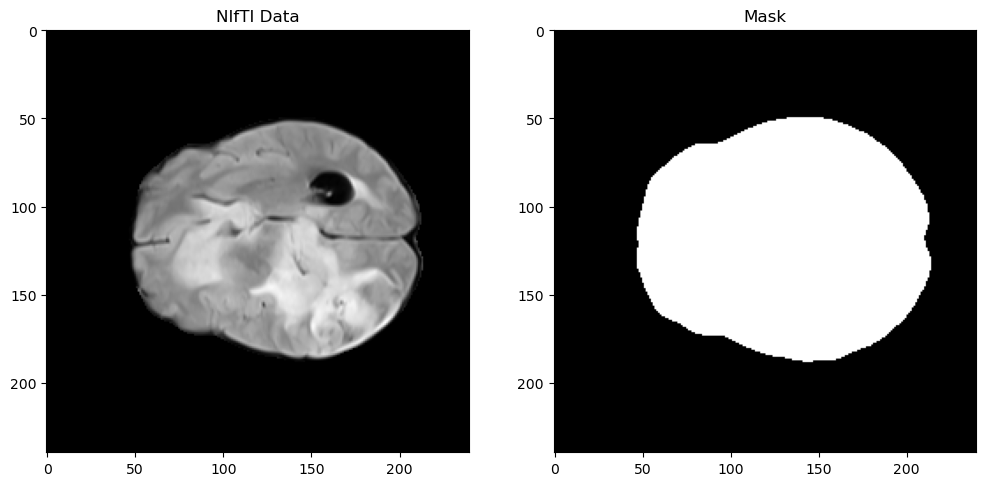

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib


# Load the NIfTI volume
input_nifti_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/data/BraTS2021_train/images/BraTS2021_01671.nii.gz'
nifti_img = nib.load(input_nifti_path)
nifti_data = nifti_img.get_fdata()
flair_sequence = nifti_data[:,:,:,0]
# Create the mask
mask = create_mask(flair_sequence)

# Print the shapes of flair sequence and mask
print("Shape of flair_sequence:", flair_sequence.shape)
mask = np.transpose(mask, (2, 1, 0))
print("Shape of mask:", mask.shape)
slice_no = flair_sequence.shape[2] // 2
# Plot the NIfTI volume and the mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot NIfTI volume
axes[0].imshow(flair_sequence[:,:,slice_no], cmap='gray')
axes[0].set_title('NIfTI Data')

# Plot mask
axes[1].imshow(mask[:,:,slice_no], cmap='gray')
axes[1].set_title('Mask')

plt.show()


### Uncertainty Estimation

### Estimating The Model Uncertainty Using The Entropy

In [15]:
def compute_entropy_with_mask(tensor, mask):
    sum_tensor = np.sum(tensor, axis=0, keepdims=True)
    tensor_normalized = tensor / (sum_tensor + 1e-12)
    entropy_elements = -tensor_normalized * np.log2(tensor_normalized + 1e-12)
    entropy = np.sum(entropy_elements, axis=0)
    # Multiply entropy with the mask
    entropy *= mask

    total_entropy = np.sum(entropy)

    return entropy, total_entropy

In [30]:
folder_path = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'
folders_names = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
folders_names

['BraTS2021_01711',
 'BraTS2021_01716',
 'BraTS2021_01696',
 'BraTS2021_01702',
 'BraTS2021_01719',
 'BraTS2021_01722',
 'BraTS2021_01710',
 'BraTS2021_01714',
 'BraTS2021_01704',
 'BraTS2021_01712',
 'BraTS2021_01670',
 'BraTS2021_01671',
 'BraTS2021_01726',
 'BraTS2021_01687',
 'BraTS2021_01676',
 'BraTS2021_01678',
 'BraTS2021_01690',
 'BraTS2021_01691',
 'BraTS2021_01667',
 'BraTS2021_01674',
 'BraTS2021_01700',
 'BraTS2021_01721',
 'BraTS2021_01680',
 'BraTS2021_01725',
 'BraTS2021_01668',
 'BraTS2021_01718',
 'BraTS2021_01706',
 'BraTS2021_01697',
 'BraTS2021_01713',
 'BraTS2021_01673',
 'BraTS2021_01672',
 'BraTS2021_01699',
 'BraTS2021_01723',
 'BraTS2021_01720',
 'BraTS2021_01679',
 'BraTS2021_01683',
 'BraTS2021_01686',
 'BraTS2021_01681',
 'BraTS2021_01694',
 'BraTS2021_01688',
 'BraTS2021_01708',
 'BraTS2021_01675',
 'BraTS2021_01695',
 'BraTS2021_01698',
 'BraTS2021_01692',
 'BraTS2021_01709',
 'BraTS2021_01689',
 'BraTS2021_01703',
 'BraTS2021_01685',
 'BraTS2021_01701']

In [31]:
len(folders_names)

50

In [32]:
folder_entropy_list = []
for i in range(len(folders_names)):
    # Example usage:

    filename = folders_names[i]
    probability_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/predictions_epoch=13-dice=81_48_task=11_fold=0_tta/{filename}.npy'
    tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)

    input_nifti_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/data/BraTS2021_train/images/{filename}.nii.gz' #make the mask from flair volume
    # Load the NIfTI volume
    nifti_img = nib.load(input_nifti_path)
    nifti_data = nifti_img.get_fdata()
    mask = create_mask(nifti_data[:,:,:,0])

    tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)
    entropy_data, total_entropy = compute_entropy_with_mask(tensor,mask)
    folder_entropy_list.append((filename, total_entropy))



In [33]:
sorted_folder_entropy_list = sorted(folder_entropy_list, key=lambda x: x[1], reverse=True)
# Print the sorted list
print(sorted_folder_entropy_list)

[('BraTS2021_01683', 157925.71562269307), ('BraTS2021_01671', 155916.73017603107), ('BraTS2021_01708', 149029.6394047321), ('BraTS2021_01716', 140858.92412587683), ('BraTS2021_01685', 132122.73460119785), ('BraTS2021_01700', 119555.86151182932), ('BraTS2021_01722', 113911.65597487554), ('BraTS2021_01698', 105279.90128782297), ('BraTS2021_01673', 100045.67258052349), ('BraTS2021_01692', 92351.78066678181), ('BraTS2021_01676', 91031.52500131376), ('BraTS2021_01709', 88959.23135666341), ('BraTS2021_01714', 80959.39735938396), ('BraTS2021_01702', 80152.06898105971), ('BraTS2021_01711', 79333.01686268178), ('BraTS2021_01691', 78662.69072997701), ('BraTS2021_01701', 78657.09567172824), ('BraTS2021_01680', 74955.63990794384), ('BraTS2021_01706', 73817.49942112647), ('BraTS2021_01723', 72396.81810939526), ('BraTS2021_01686', 67197.19332401801), ('BraTS2021_01710', 67133.09195691624), ('BraTS2021_01704', 67094.89817734133), ('BraTS2021_01697', 63542.42364431233), ('BraTS2021_01720', 63016.91850

In [34]:
# Convert the list of tuples to a NumPy array
sorted_folders_entropy_file = np.array(sorted_folder_entropy_list, dtype=[('name', '<U20'), ('value', '<f8')])

# Save the NumPy array as an .npy file
np.save('/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/sorted_folders_entropy_b4.npy', sorted_folders_entropy_file)

In [35]:
names = [item[0] for item in sorted_folder_entropy_list]
# Convert the list of names to a NumPy array
names_array = np.array(names)

# Save the NumPy array as an .npy file
np.save('/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/sorted_uncertain_folders_names_b4.npy', names_array)

In [4]:
import numpy as np
# Load the .npy file
sorted_uncertain_folders_names = np.load('/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/sorted_uncertain_folders_names_b4.npy')

# Print the loaded data
print(sorted_uncertain_folders_names)

['BraTS2021_01683' 'BraTS2021_01671' 'BraTS2021_01708' 'BraTS2021_01716'
 'BraTS2021_01685' 'BraTS2021_01700' 'BraTS2021_01722' 'BraTS2021_01698'
 'BraTS2021_01673' 'BraTS2021_01692' 'BraTS2021_01676' 'BraTS2021_01709'
 'BraTS2021_01714' 'BraTS2021_01702' 'BraTS2021_01711' 'BraTS2021_01691'
 'BraTS2021_01701' 'BraTS2021_01680' 'BraTS2021_01706' 'BraTS2021_01723'
 'BraTS2021_01686' 'BraTS2021_01710' 'BraTS2021_01704' 'BraTS2021_01697'
 'BraTS2021_01720' 'BraTS2021_01712' 'BraTS2021_01667' 'BraTS2021_01689'
 'BraTS2021_01694' 'BraTS2021_01670' 'BraTS2021_01688' 'BraTS2021_01675'
 'BraTS2021_01699' 'BraTS2021_01718' 'BraTS2021_01690' 'BraTS2021_01672'
 'BraTS2021_01703' 'BraTS2021_01725' 'BraTS2021_01674' 'BraTS2021_01696'
 'BraTS2021_01721' 'BraTS2021_01668' 'BraTS2021_01726' 'BraTS2021_01678'
 'BraTS2021_01695' 'BraTS2021_01719' 'BraTS2021_01713' 'BraTS2021_01681'
 'BraTS2021_01687' 'BraTS2021_01679']


### Interactive Visualization

In [26]:
from ipywidgets import widgets
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

def plot_single_slice(file_name, slice_index, input_data, prediction_data, entropy_data):
    labels = ['background', 'necrosis', 'edema', 'enhancing tumor']
    colors = ['black', 'red', 'green', 'blue']
    cmap = ListedColormap(colors) # Define the colormap

    fig, ax = plt.subplots(1, 4, figsize=(15, 7))
    alpha_channel = np.where(input_data[:, :, slice_index] == 0, 0, 0.7)

    ax[3].imshow(input_data[:, :, slice_index], cmap='gray')  
    ax[3].imshow(entropy_data[:, :, slice_index], cmap='hot', alpha=alpha_channel)  
    ax[3].set_title('Uncertainty on top of Input')

    ax[2].imshow(entropy_data[ :, :,slice_index], cmap='inferno')  # Using a colormap better suited for entropy
    ax[2].set_title(f'{file_name}')

    ax[1].imshow(prediction_data[ :, :,slice_index], cmap=cmap)
    ax[1].set_title('Segmentation')

    ax[0].imshow(input_data[ :, :,slice_index], cmap='gray')
    ax[0].set_title('Input')

    # Create a legend
    patches = [mpatches.Patch(color=colors[i], label=f"{i}, {colors[i]}, {labels[i]}") for i in range(len(labels))]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.suptitle(f'{file_name} - Slice {slice_index}', y=0.98)  # moving the title up slightly

    plt.show()

def plot_single_image(file_name, input_data, prediction_data, entropy_data):
    # Assuming that entropy_tensor is a 3D numpy array with shape (256, 256, 256)
    # or that load_image_data function is capable of reading it into this shape

    min_index = 0
    max_index = entropy_data.shape[2] - 1  # Changed to 0, assuming that entropy_tensor is 3D with shape (256, 256, 256)

    # Clear the output before displaying the new widget
    clear_output(wait=True)
    # Create interactive plot
    widget_instance = widgets.interact(
        plot_single_slice,
        file_name=widgets.fixed(file_name),
        slice_index=widgets.IntSlider(min=min_index, max=max_index, step=1, value=max_index // 2),
        entropy_data=widgets.fixed(entropy_data),  # Passed entropy_tensor here
        prediction_data=widgets.fixed(prediction_data),
        input_data = widgets.fixed(input_data),
    )

    widget_instance


In [27]:
filename = 'BraTS2021_01714'
# Load the probability data
probability_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/predictions_epoch=13-dice=81_48_task=11_fold=0_tta/{filename}.npy'
tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)
input_nifti_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/data/BraTS2021_train/images/{filename}.nii.gz' #make the mask from flair volume

nifti_img = nib.load(input_nifti_path)
nifti_data = nifti_img.get_fdata()
flair_sequence = nifti_data[:,:,:,0]
# Create the mask
mask = create_mask(flair_sequence)
print("mask shape: ", mask.shape)

tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)
entropy_data, total_entropy = compute_entropy_with_mask(tensor,mask)
entropy_data = np.transpose(entropy_data, (2, 1,0 ))
print("tensor shape: ", tensor.shape)
print("entropy_data shape: ", entropy_data.shape)
# Load the input NIfTI file
input_data = flair_sequence
# input_data = np.transpose(input_data, (1, 0, 2))
print("input_data shape: ", input_data.shape)


# Load the Prediction NIfTI file
prediction_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/unlabeled_pool/data/BraTS2021_train/labels/{filename}_seg.nii.gz'
prediction_data = nib.load(prediction_path).get_fdata()  # Shape: (height, width, depth)
# prediction_data = np.transpose(prediction_data, (1, 0, 2))
print("prediction_data shape: ", prediction_data.shape)



mask shape:  (155, 240, 240)
tensor shape:  (4, 155, 240, 240)
entropy_data shape:  (240, 240, 155)
input_data shape:  (240, 240, 155)
prediction_data shape:  (240, 240, 155)
seg shape:  (240, 240, 155)


In [28]:
# Test the function
plot_single_image('Entropy Image', flair_sequence, prediction_data, entropy_data)

interactive(children=(IntSlider(value=77, description='slice_index', max=154), Output()), _dom_classes=('widge…

In [5]:
import os
import shutil
import csv

# Source and destination folder paths
source_folder = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'
destination_folder = '/home/workstation04/GP_MMMAI/All_Data'


# Copy the first 10 folders
for i, folder_name in enumerate(sorted_uncertain_folders_names[:10]):
    source_path = os.path.join(source_folder, folder_name)
    destination_path = os.path.join(destination_folder, folder_name)
    
    # Copy the folder
    shutil.copytree(source_path, destination_path)
    




make the dataset with 10 random samples from brats africa

In [7]:
import os
import shutil
import csv
import random

# Source and destination folder paths
source_folder = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'
destination_folder = '/home/workstation04/GP_MMMAI/All_Data'

# List all folder names
folder_names = os.listdir(source_folder)

# Shuffle the folder names randomly
random.shuffle(folder_names)
print(folder_names)

['BraTS2021_01687', 'BraTS2021_01723', 'BraTS2021_01720', 'BraTS2021_01709', 'BraTS2021_01680', 'BraTS2021_01719', 'BraTS2021_01697', 'BraTS2021_01675', 'BraTS2021_01713', 'BraTS2021_01714', 'BraTS2021_01690', 'BraTS2021_01688', 'BraTS2021_01678', 'BraTS2021_01695', 'BraTS2021_01706', 'BraTS2021_01698', 'BraTS2021_01721', 'BraTS2021_01691', 'BraTS2021_01718', 'BraTS2021_01672', 'BraTS2021_01701', 'BraTS2021_01696', 'BraTS2021_01686', 'BraTS2021_01673', 'BraTS2021_01670', 'BraTS2021_01704', 'BraTS2021_01668', 'BraTS2021_01676', 'BraTS2021_01667', 'BraTS2021_01716', 'BraTS2021_01679', 'BraTS2021_01681', 'BraTS2021_01708', 'BraTS2021_01700', 'BraTS2021_01692', 'BraTS2021_01685', 'BraTS2021_01712', 'BraTS2021_01702', 'BraTS2021_01689', 'BraTS2021_01699', 'BraTS2021_01674', 'BraTS2021_01710', 'BraTS2021_01726', 'BraTS2021_01722', 'BraTS2021_01725', 'BraTS2021_01703', 'BraTS2021_01683', 'BraTS2021_01671', 'BraTS2021_01694', 'BraTS2021_01711']


In [8]:
# Copy the first 10 shuffled folders
for i, folder_name in enumerate(folder_names[:10]):
    source_path = os.path.join(source_folder, folder_name)
    destination_path = os.path.join(destination_folder, folder_name)
    
    # Copy the folder
    shutil.copytree(source_path, destination_path)
